In [1]:
#standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Getting our data ready to be used with machine learning 
1.split the data in to features and labels 
2.filling also called imputing or disregarding missing values
3.converting non numerical values to numerical values (also called d feature encoding)

In [2]:
car_sales=pd.read_csv("data/car-sales-extended.csv")
car_sales.head()


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [3]:
len(car_sales)

1000

In [4]:
type(car_sales)

pandas.core.frame.DataFrame

In [5]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [7]:
# spliting the data in to features and labels (X,Y)
X=car_sales.drop("Price", axis=1)
Y=car_sales["Price"]

#split in to training and test data 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

In [8]:
# turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],
                             remainder="passthrough")
transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [9]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(transformed_X,Y,test_size=0.2)


## what if there is missing values in data
1. fill them with some value also known as imputation
2. remove the samples with missing data all together

In [14]:
# import car sales missing data
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [15]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

## fill missing data with pandas 

In [16]:
# fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)
#fill the color column
car_sales_missing["Colour"].fillna("missing", inplace=True)
# fill the odometer column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
# fill the doors column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [17]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [18]:
# remove rows with missing price value
car_sales_missing.dropna(inplace=True)

In [19]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [20]:
len(car_sales_missing)

950

In [21]:
# create X and Y 

X=car_sales_missing.drop("Price", axis=1)
Y=car_sales_missing["Price"]


In [22]:
# convert data in to numbers 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],
                             remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## option 2 fill missing values with Scikit_learn

In [23]:
car_sales_missing=pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [24]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [25]:
# Drop the rows with no labels (y) in this case price
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [27]:
# split X and Y 
X=car_sales_missing.drop("Price", axis=1)
Y=car_sales_missing["Price"]

In [28]:
# fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with missing and numerical values with mean 
cat_imputer=SimpleImputer(strategy="constant", fill_value="missing")
door_imputer=SimpleImputer(strategy="constant", fill_value=4)
num_imputer=SimpleImputer(strategy="mean")

#Define columns 
cat_features=["Make","Colour"]
door_features=["Doors"]
num_features=["Odometer (KM)"]

# create an imputer (Something that fills missing data)
imputer=ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])

#Transform the data 
filled_X =imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [29]:
car_sales_filled=pd.DataFrame(filled_X,columns=["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [30]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [31]:
# convert data in to numbers 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,categorical_features)],
                             remainder="passthrough")
transformed_X=transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [32]:
#Now we have got our data as numbers and filled
#lets fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(transformed_X,Y,test_size=0.2)
model= RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.21990196728583944

## choosing the right estimator oe model for our problem
* classification model checking whether a sample is one thing or another
* Regression model predicting a number 

## 1. Picking a machine learning model for regression

In [33]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
#import boston house data (default data od scikit-learn)
from sklearn.datasets import load_boston
boston=load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [35]:
boston_df=pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [36]:
len(boston_df)

506

In [37]:
# lets try the Ridge regression model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [38]:
# lets try the Ridge regression model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#set up random seed and create data
np.random.seed(42)
X= boston_df.drop("target", axis=1)
Y=boston_df["target"]

#split into train and test sets
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

#instantiate Ridge model
model= Ridge()
model.fit(X_train,Y_train)

# check the score of the Ridge model 
model.score(X_test,Y_test)


0.6662221670168522

# What if Ridge model was not working

In [39]:
# trying Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#set up random seed and create data
np.random.seed(42)
X= boston_df.drop("target", axis=1)
Y=boston_df["target"]

#split into train and test sets
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

#instantiate Ridge model
model= RandomForestRegressor()
model.fit(X_train,Y_train)

# check the score of the Ridge model 
model.score(X_test,Y_test)

0.8654448653350507

## choosing an estimator for a classification problem

In [40]:
# importing data from CSV
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
len(heart_disease)

303

In [42]:
# trying linear SVC 
from sklearn.svm import LinearSVC
np.random.seed(42)
X=heart_disease.drop("target", axis=1)
Y=heart_disease["target"]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)
clf=LinearSVC(max_iter=10000)
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

C:\Users\ADMIN\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [43]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [44]:
# trying Random forest classifier
#import RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#Make the data
X=heart_disease.drop("target", axis=1)
Y=heart_disease["target"]

#split the data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

# Instantiate model
clf=RandomForestClassifier()

#fit the data 
clf.fit(X_train,Y_train)

#evaluate the model
clf.score(X_test,Y_test)

0.8524590163934426

# make predictions using a machine learning model

In [45]:
# use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [46]:
# truth values 
np.array(Y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [47]:
# compare predictions to truth labels to evaluate the model
Y_preds=clf.predict(X_test)
np.mean(Y_preds==Y_test)

0.8524590163934426

In [48]:
clf.score(X_test,Y_test)

0.8524590163934426

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_preds,Y_test)

0.8524590163934426

In [50]:
# make prediction with predict proba( Predict proba() returns the probability of a classification label in our case 1 0r 0)

clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [51]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [52]:
# Making predictions with our Regression Model

# trying Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#set up random seed and create data
np.random.seed(42)
X= boston_df.drop("target", axis=1)
Y=boston_df["target"]

#split into train and test sets
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

#instantiate Ridge model
model= RandomForestRegressor()
model.fit(X_train,Y_train)

#Make predictions 
Y_preds=model.predict(X_test)
Y_preds

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639, 19.787, 19.541,  8.583, 21.85 , 19.531, 25.851,
       19.759,  8.22 , 45.109, 14.712, 24.548, 23.956, 14.548, 22.944,
       15.023, 14.643, 21.137, 14.153, 19.232, 20.666, 19.588, 23.254,
       33.01 , 20.461, 14.271, 15.889, 34.704, 19.154, 20.85 , 24.395,
       18.978, 29.84 , 45.302, 19.447, 22.234, 13.751, 15.511, 24.612,
       18.729, 28.235, 21.21 , 34.218, 17.271, 26.147, 45.279, 21.924,
       15.532, 32.412, 22.212, 20.453, 25.532, 34.326, 28.795, 18.951,
       27.145, 17.181, 13.534, 23.04 , 28.714, 15.802, 20.451, 27.87 ,
       10.193, 21.507, 22.383,  7.265, 20.089, 45.388, 10.88 , 13.053,
       21.322, 12.366, 20.233,  9.135, 20.052, 26.787, 15.277, 23.267,
       23.613, 17.699, 21.617,  7.921, 19.475, 18.807, 22.386, 19.836,
       38.714, 13.159, 12.476, 13.612, 20.205, 23.832])

In [53]:
# truth values 
np.array(Y_test)

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4])

In [54]:
# compare the predictions to truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test,Y_preds)

2.136382352941176

## Evaluating a Machine learning model



In [55]:
#Evaluating a method with score
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#Make the data
X=heart_disease.drop("target", axis=1)
Y=heart_disease["target"]

#split the data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

# Instantiate model
clf=RandomForestClassifier()

#fit the data 
clf.fit(X_train,Y_train)


RandomForestClassifier()

In [56]:
clf.score(X_test,Y_test)

0.8524590163934426

In [57]:
clf.score(X_train,Y_train)

1.0

#Evaluating a a model using the scoring parameter

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#Make the data
X=heart_disease.drop("target", axis=1)
Y=heart_disease["target"]

#split the data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

# Instantiate model
clf=RandomForestClassifier()

#fit the data 
clf.fit(X_train,Y_train)


RandomForestClassifier()

In [59]:
clf.score(X_test,Y_test)

0.8524590163934426

In [60]:
cross_val_score(clf,X,Y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

## classification model evaluation metrics
#Accuracy , Area under Roc curve, confusion matrix,classification report

In [61]:
#Acuracy
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#Make the data
X=heart_disease.drop("target", axis=1)
Y=heart_disease["target"]

cross_val_score=cross_val_score(clf,X,Y)
np.mean(cross_val_score)


0.8248087431693989

#Area under Reciver operating characteristic curve (AUC/ROC)
#roc curves are comparision of a models true positive rate (tpr) vs models false positive rate (fpr)

In [62]:
from sklearn.metrics import roc_curve
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)
clf.fit(X_train,Y_train)
Y_probs=clf.predict_proba(X_test)
Y_probs[:10]


array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [63]:
Y_probs_positive= Y_probs[:,1]
Y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [64]:
# calculate fpr, tpr and threshhold
fpr,tpr,thresholds= roc_curve(Y_test,Y_probs_positive)

# check the false positive rates 
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [65]:
tpr

array([0.     , 0.     , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.375  , 0.5    , 0.53125, 0.5625 , 0.59375, 0.59375, 0.625  ,
       0.71875, 0.71875, 0.78125, 0.8125 , 0.90625, 0.90625, 0.9375 ,
       0.9375 , 0.96875, 0.96875, 1.     , 1.     ])

In [66]:
# create a function for ploting ROC curve
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    
    #plot roc curve 
    plt.plot(fpr,tpr,color="orange",label="ROC")
    #plot line with no predictive power (baselines)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    
    #customize the plot 
    plt.xlabel=("False positive rate (fpr)")
    plt.ylabel=("True positive rate (tpr)")
    plt.title("Reciever operating charecterstics (ROC) curve")
    plt.legend()
    plt.show()
    
    


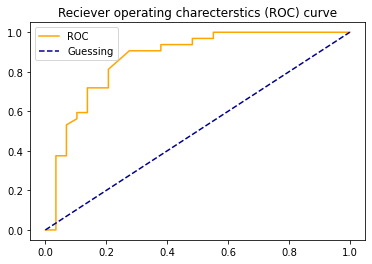

In [67]:
plot_roc_curve(fpr,tpr)

In [68]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_probs_positive)

0.8669181034482759

# confusion Matrix
 a confusion matrix is a quick way to compare the labels a model predicts and th actual labels it was supposed to predict
 In esence ,giving you idea where the model is getting confused

In [69]:
from sklearn.metrics import confusion_matrix
Y_preds=clf.predict(X_test)
confusion_matrix(Y_test,Y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [70]:
#visualize confusion matrix with pd.crosstab()
pd.crosstab(Y_test,Y_preds,rownames=["Actual Label"],colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,23,6
1,6,26


<AxesSubplot:>

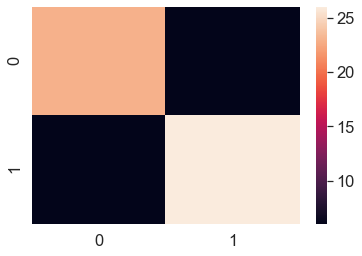

In [71]:
# Make our confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create a confusion matrix
conf_mat=confusion_matrix(Y_test,Y_preds)

#plot it using seaborn
sns.heatmap(conf_mat)

## regression model evaluation metrics
R^2
Mean absolute error MAE
Mean squared error MSE

In [74]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X= boston_df.drop("target", axis=1)
Y=boston_df["target"]

#split into train and test sets
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

#instantiate RandomForestRegressor model
model= RandomForestRegressor()
model.fit(X_train,Y_train)

model.score(X_test,Y_test)


0.8654448653350507

In [75]:
from sklearn.metrics import r2_score

#fill an array with y test mean
y_test_mean=np.full(len(Y_test),Y_test.mean())

In [76]:
Y_test.mean()

21.488235294117654

In [77]:
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [83]:
r2_score(Y_test, y_test_mean)

2.220446049250313e-16

In [80]:
r2_score(Y_test, Y_test)

1.0

# Mean absolute error

In [84]:
#mean absolute error 
from sklearn.metrics import mean_absolute_error
y_preds=model.predict(X_test)
mae=mean_absolute_error(Y_test,y_preds)
mae

2.136382352941176

In [87]:
df=pd.DataFrame(data={"actual values":Y_test, "Predicted values":y_preds})
df["differences"]=df["Predicted values"] -df["actual values"]
df

,actual values,Predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


In [88]:
#Mean square error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,y_preds)
mse

9.867437068627442

In [89]:
df=pd.DataFrame(data={"actual values":Y_test, "Predicted values":y_preds})
df["differences"]=df["Predicted values"] -df["actual values"]
squared=np.square(df["differences"])
squared.mean()

9.867437068627439

#finally using the scoring parameter

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart_disease.drop("target",axis=1)
Y=heart_disease["target"]
clf=RandomForestClassifier()


In [92]:
np.random.seed(42)
cv_acc= cross_val_score(clf, X, Y, cv=5)

In [93]:
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [94]:
# cross validate accuracy
print(f'The cross-validate accuracy is:{np.mean(cv_acc)*100:2f}%')

The cross-validate accuracy is:82.480874%


In [95]:
np.random.seed(42)
cv_acc= cross_val_score(clf, X, Y, cv=5, scoring="accuracy")
print(f'The cross-validate accuracy is:{np.mean(cv_acc)*100:2f}%')

The cross-validate accuracy is:82.480874%


In [97]:
#precission
cv_precission=cross_val_score(clf,X,Y,cv=5, scoring="precision")
np.mean(cv_precission)

0.8209201193072161

In [99]:
#Recall
cv_recall=cross_val_score(clf,X,Y,cv=5, scoring="recall")
np.mean(cv_recall)

0.8727272727272727

In [100]:
cv_f1=cross_val_score(clf,X,Y,cv=5, scoring="f1")
np.mean(cv_f1)

0.8256946143361409

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X= boston_df.drop("target", axis=1)
Y=boston_df["target"]

#split into train and test sets
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

#instantiate RandomForestRegressor model
model= RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [103]:
np.random.seed(42)
cv_r2=cross_val_score(model,X,Y,cv=5,scoring=None)
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [104]:
np.random.seed(42)
cv_r2=cross_val_score(model,X,Y,cv=5,scoring="r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [106]:
np.random.seed(42)
cv_mae=cross_val_score(model,X,Y,cv=5,scoring="neg_mean_absolute_error")
cv_mae

array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584])

In [108]:
np.random.seed(42)
cv_mse=cross_val_score(model,X,Y,cv=5,scoring="neg_mean_squared_error")
cv_mse

array([ -7.86326927, -12.71243178, -20.29089194, -45.93287403,
       -19.50774726])

In [109]:
np.mean(cv_mse)

-21.261442856882137

#using diffrent evaluating metrics as Scikit-learn functions

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart_disease.drop("target",axis=1)
Y=heart_disease["target"]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,Y_train)

#make some predictions
y_preds= clf.predict(X_test)

#Evaluate the classifier
print("classifier metrics on the test set")
print(f"Accuracy:{accuracy_score(Y_test,y_preds)*100:2f}%")
print(f"Precision:{precision_score(Y_test,y_preds)}")
print(f"Recall:{recall_score(Y_test,y_preds)}")
print(f"f1:{f1_score(Y_test,y_preds)}")

classifier metrics on the test set
Accuracy:85.245902%
Precision:0.8484848484848485
Recall:0.875
f1:0.8615384615384615


In [116]:
# regression model evaluation using scikit learn

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# trying Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#set up random seed and create data
np.random.seed(42)
X= boston_df.drop("target", axis=1)
Y=boston_df["target"]

#split into train and test sets
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

#instantiate Random forest model
model= RandomForestRegressor()
model.fit(X_train,Y_train)
y_preds= model.predict(X_test)

#evaluate the regression model
print("Regression model metrics on the test data")
print(f"R^2: {r2_score(Y_test,y_preds)}")
print(f"MAE: {mean_absolute_error(Y_test,y_preds)}")
print(f"MSE: {mean_squared_error(Y_test,y_preds)}")

Regression model metrics on the test data
R^2: 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442


## Improving a Model
--> from a data perspective(could we get more training data)
--> Could we Improve our data 
--> from a model perspective is there a better model
--> could we improve the current model
parameters = model finds these patterns in data 
Hyperparameter=setting you can adjust to potentially improve its ability to find patterns 

In [119]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

In [120]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#three ways to adjust Hyperparameter
1. By hand
2. Randomly with RandomsearchCV
3. Exhaustively with GridsearchCv

# tuning Hyper parameters by hand 

#lets make three sets Training validationa and test.
we are going to adjust
* max_depth
* max_features
* min_samples_leaf
* min_sample_split
* n_estimators


In [126]:
def evaluate_preds(y_true,y_preds):
    """
    Perform evaluation comparission on y_true labels vs. y_pred labels on classification model
    """
    accuracy= accuracy_score(y_true,y_preds)
    precision= precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict= {"accuracy":round(accuracy,2),
                 "precision":round(precision,2),
                 "recall":round(recall,2),
                 "f1":round(f1,2)}
    print(f"Acc : {accuracy *100 :2f}%")
    print(f"Precission: {precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1:{f1:.2f}")
    
    return metric_dict

In [127]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#shuffle the data 
heart_disease_shuffled=heart_disease.sample(frac=1)

#split in to X and y
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

# split the data in to train , validation and test data 
train_split= round(0.7*len(heart_disease_shuffled))
valid_split= round(train_split+0.15*len(heart_disease_shuffled))
X_train, y_train=X[:train_split], y[:train_split]
X_valid, y_valid=X[train_split:valid_split], y[train_split:valid_split]
X_test,y_test=X[valid_split:],y[valid_split:]

# instantiate estimator and fit the training data 
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

#make baseline predictions
y_preds=clf.predict(X_valid)

#Evaluate the classifier on validation set

baseline_metrics=evaluate_preds(y_valid,y_preds)
baseline_metrics



Acc : 82.222222%
Precission: 0.81
Recall:0.88
F1:0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [128]:
# create a second classifier with diffrent hyper params
np.random.seed(42)
clf_2=RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train,y_train)

#make prediction
y_preds_2=clf_2.predict(X_valid)

#evaluate the second classifier
clf_2_metrics=evaluate_preds(y_valid,y_preds_2)

Acc : 82.222222%
Precission: 0.84
Recall:0.84
F1:0.84


# Hyperparams tuning with randomsearchcv

In [129]:
from sklearn.model_selection import RandomizedSearchCV

grid={"n_estimators":[10,100,200,500,1000,1200],"max_depth":[None,5,10,20,30],
     "max_features":["auto","sqrt"],"min_samples_split":[2,4,6],
     "min_samples_leaf":[1,2,4]}

np.random.seed(42)

#split into X and y
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

#Instantiate RandomForestClassifier
clf=RandomForestClassifier(n_jobs=1)

#setup RandomizedSearchCv
rs_clf= RandomizedSearchCV(estimator=clf,
                          param_distributions=grid,
                          n_iter=10,
                          cv=5,
                          verbose=2)

#fit the RandomizedSearchCV version of clf 
rs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [130]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [131]:
#make predictions with best hyperparameters
rs_y_preds=rs_clf.predict(X_test)

#evaluate the predictions

rs_metrics=evaluate_preds(y_test,rs_y_preds)

Acc : 81.967213%
Precission: 0.77
Recall:0.86
F1:0.81


### hyperparams tuning with GridSearchCV

In [133]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [134]:
grid_2={'n_estimators': [ 100, 200, 500],
        'max_depth': [None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [6],
        'min_samples_leaf': [1, 2]}

In [135]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

#split into X and y
X=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

#Instantiate RandomForestClassifier
clf=RandomForestClassifier(n_jobs=1)

#setup GridSearchCv
gs_clf= GridSearchCV(estimator=clf,
                     param_grid=grid_2,
                     cv=5,
                     verbose=2)

#fit the GridSearchCV version of clf 
gs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [136]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [137]:
gs_y_preds=gs_clf.predict(X_test)
gs_metrics=evaluate_preds(y_test,gs_y_preds)

Acc : 78.688525%
Precission: 0.74
Recall:0.82
F1:0.78


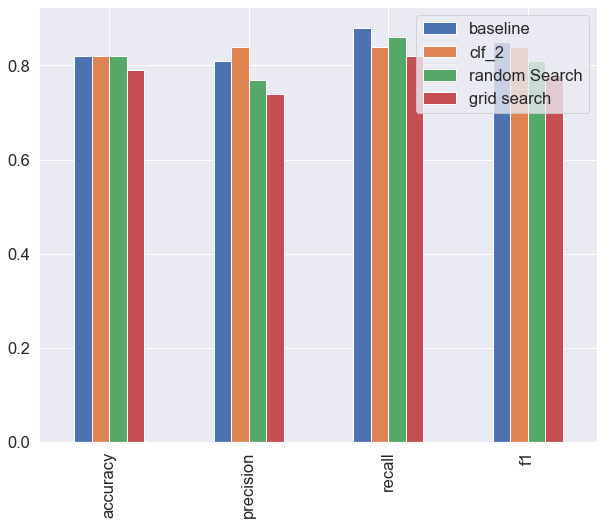

In [144]:
# lets compare our diffrent model metrics

compare_metrics=pd.DataFrame({"baseline":baseline_metrics,"clf_2":clf_2_metrics,
                              "random Search":rs_metrics,"grid search":gs_metrics})
compare_metrics.plot.bar(figsize=(10,8));

## saving and loading machine learning models
 
Two ways to save and load Machine learning models
1. with python 'pickle' model
2. with the 'joblib' model



In [145]:
import pickle

#save an existing model to file
pickle.dump(gs_clf,open("gs_random_random_forest_model.pk1","wb"))

In [146]:
# load a saved model
loaded_pickle_model=pickle.load(open("gs_random_random_forest_model.pk1","rb"))

In [148]:
#make some predictions
pickle_y_preds=loaded_pickle_model.predict(X_test)
evaluate_preds(Y_test,pickle_y_preds)
#error occurs as xtest is being instantiated in above cell

## with joblib model

In [149]:
#saving a model
from joblib import dump,load
dump(gs_clf,filename="gs_random_forest_model1.joblib")

['gs_random_forest_model1.joblib']

In [150]:
# opening a model
loaded_job_model=load(filename="gs_random_forest_model1.joblib")

In [151]:
# make and evaluate model
joblib_y_preds=loaded_job_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

Acc : 78.688525%
Precission: 0.74
Recall:0.82
F1:0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## putting it alltogether (Final Step)

In [153]:
data=pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [156]:
#getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

#Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

#Setting random seed
import numpy as np
np.random.seed(42)

#import data and drop rows with missing labels

data=pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

#define diffrent features and transformer pipeline
categorical_features=["Make","Colour"]
categorical_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant", fill_value="missing")),
    ("Onehot", OneHotEncoder(handle_unknown="ignore"))])

door_features=["Doors"]
door_treansformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features=["Odometer (KM)"]
numeric_transformer=Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="mean"))
])

#setup preprocessing steps (fill missing values and convert data in to numbers)
preprocessor=ColumnTransformer(
                               transformers=[
                                   ("cat",categorical_transformer,categorical_features),
                                   ("door",door_treansformer,door_features),
                                   ("num",numeric_transformer,numeric_features)
                               ])

# creating a preprocessing and modelling pipeline 
model=Pipeline(steps=[("preprocessor",preprocessor),
                     ("model",RandomForestRegressor())])

# split data 
X=data.drop("Price", axis=1)
y=data["Price"]
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

#fit and Score the model

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.22188417408787875

In [162]:
# use GridSearchCV with our regression pipeline

from sklearn.model_selection import GridSearchCV
pipe_grid={
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features":["auto"],
    "model__min_samples_split":[2,4]
}

gs_model=GridSearchCV(model, pipe_grid,cv=5, verbose=2)
gs_model.fit(X_train,y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('Onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [164]:
gs_model.score(X_test,y_test)

0.3339554263158365